# Bank Marketing

### Problem

- Optimizing targeting for telemarketing, under a growing pressure to increase profits and reduce costs in Banks

### Goals

- Focus on targeting through telemarketing phone calls to sell long-term deposits
- The goal was to model the success of subscribing a long-term deposit using attributes that were known before the telemarketing call was executed
- A particular emphasis was given on feature engineering, as we considered an initial set of 150 input attributes, including the commonly used bank client and product features and also newly proposed social and economic indicators

### Dataset
- analyze a recent and large dataset from a Portuguese bank
- The data were collected from 2008 to 2013, thus including the effects of the global financial crisis that peaked in 2008


#  **Input variables**
**1. age:** (numeric)

**2. job :** type of job (categorical: ‘admin.’,’blue collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)

**3. marital :** marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

**4. education (categorical:** ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’professional.course’,’university.degree’,’unknown’)

**5. default:** has credit in default? (categorical: ‘no’,’yes’,’unknown’)

**6. housing:** has housing loan? (categorical: ‘no’,’yes’,’unknown’)

**7. loan:** has personal loan? (categorical: ‘no’,’yes’,’unknown’)

**8. contact:** contact communication type (categorical: ‘cellular’,’telephone’)

**9. month:** last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

**10. day** : last contact day

**11. duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**12. campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

**13. pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**14. previous:** number of contacts performed before this campaign and for this client (numeric)

**15. poutcome:** outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
social and economic context attributes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning,UserWarning))
%matplotlib inline

import seaborn as sns

In [2]:
# Read file
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [4]:
data.shape

(11162, 17)

In [5]:
# Melihat data null / missing value

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
data.describe(include = 'O')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


# Categorical and Numerical Variables

In [8]:
num_var = data._get_numeric_data().columns
cat_var= list(set(data.columns) - set(num_var))
print(num_var)
print(cat_var)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
['poutcome', 'job', 'marital', 'housing', 'loan', 'default', 'month', 'education', 'contact', 'deposit']


# Analisa Univariate

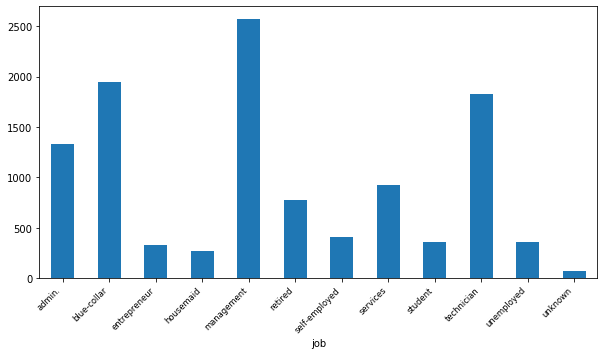

In [9]:
# job : type of job 
# categorical: ‘admin.’,’blue collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’
plt.figure(figsize=(10,5))
data.groupby('job').size().plot(kind='bar')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

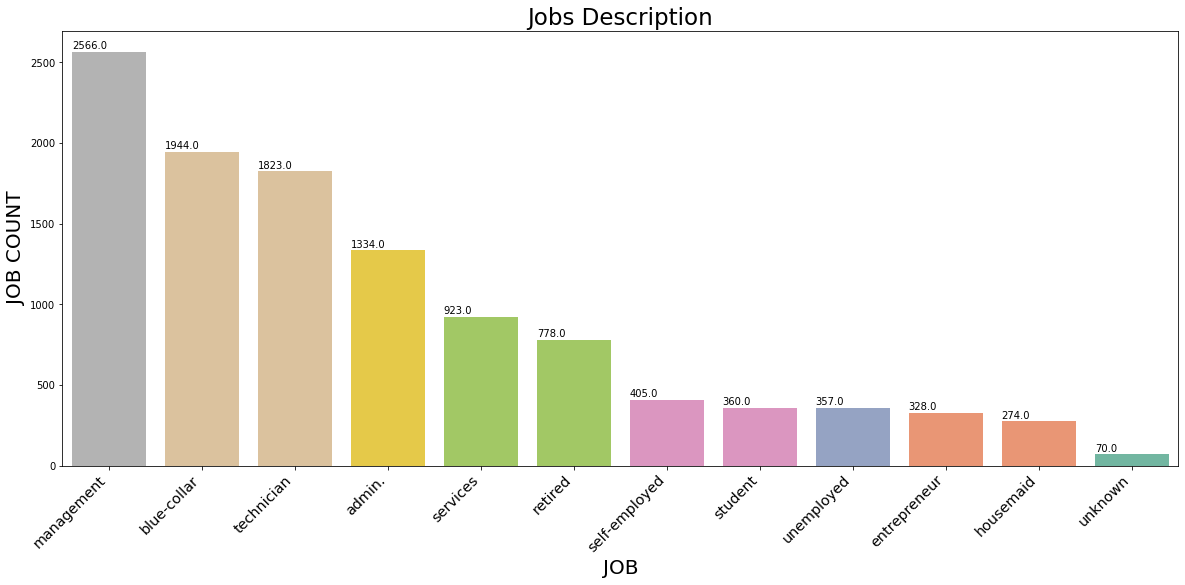

In [10]:
plt.figure(figsize=(20,8))
data_job = data['job'].value_counts().nlargest(15).astype(int)
ax = sns.barplot(data_job.index, data_job.values,palette= 'Set2_r')


plt.title('Jobs Description',fontsize=23)
plt.xlabel('JOB',fontsize = 20)
plt.ylabel('JOB COUNT',fontsize = 20)


plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 

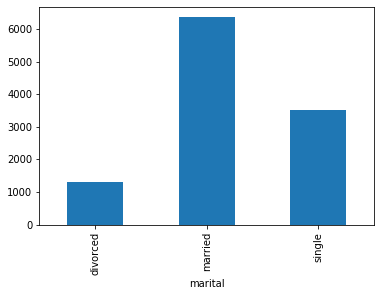

In [11]:
# marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

data.groupby('marital').size().plot(kind='bar')

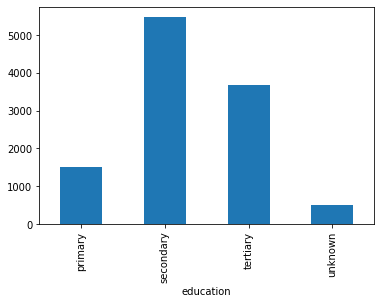

In [12]:
# education categorical: ‘basic.4y’,’basic.6y’,’basic.9y’ ; ’high.school’,’professional.course’,’university.degree’,’unknown’)


data.groupby('education').size().plot(kind='bar')

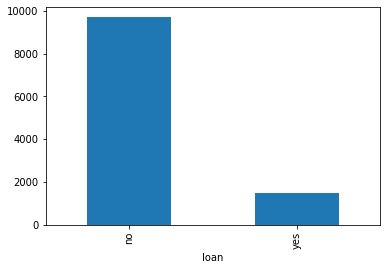

In [13]:
# loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

data.groupby('loan').size().plot(kind='bar')

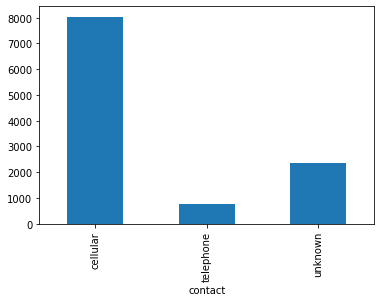

In [14]:
# contact: contact communication type (categorical: ‘cellular’,’telephone’)

data.groupby('contact').size().plot(kind='bar')

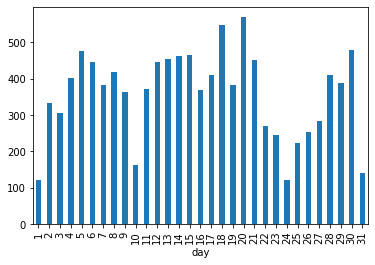

In [15]:
# day : last contact day

data.groupby('day').size().plot(kind='bar')

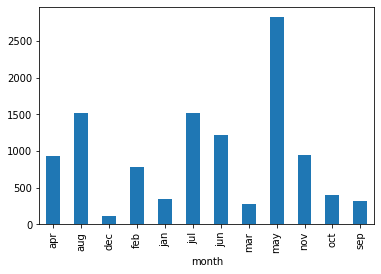

In [16]:
# month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

data.groupby('month').size().plot(kind='bar')

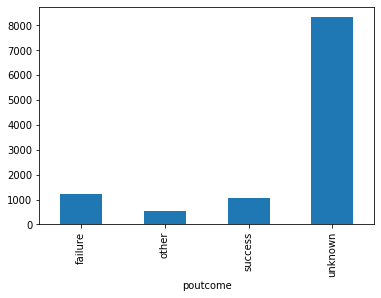

In [17]:
# poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’) social and economic context attributes

data.groupby('poutcome').size().plot(kind='bar')

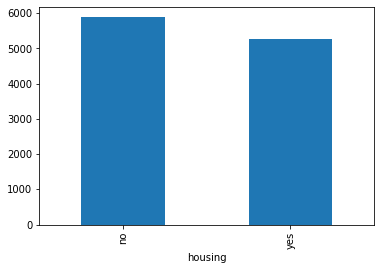

In [18]:
# housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)

data.groupby('housing').size().plot(kind='bar')

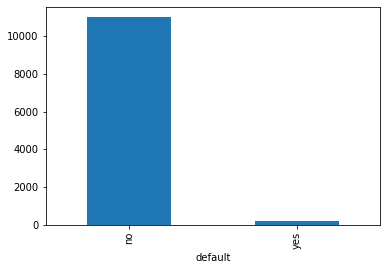

In [19]:
# default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)

data.groupby('default').size().plot(kind='bar')

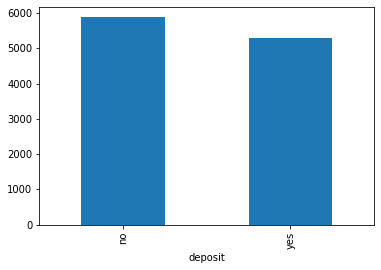

In [20]:


data.groupby('deposit').size().plot(kind='bar')

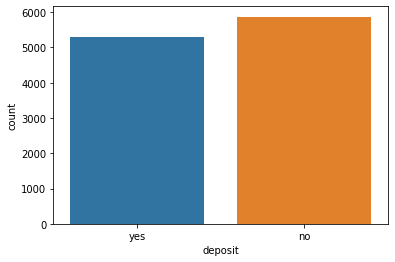

In [21]:
sns.countplot(x='deposit',data= data,)
plt.show()

# Multivariate Analysis 

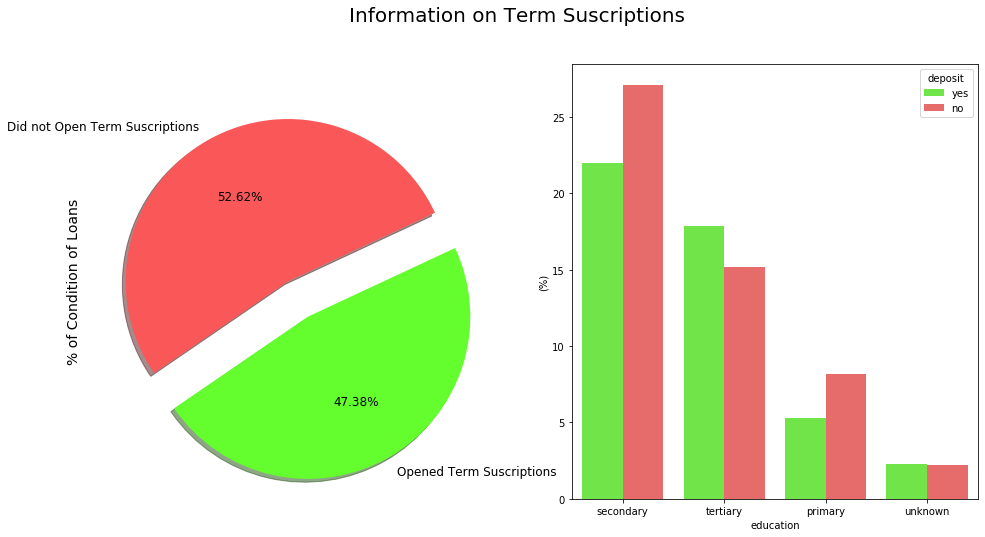

In [22]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["deposit"].value_counts().plot.pie(explode=[0,0.25], 
                                        autopct='%1.2f%%', 
                                        ax=ax[0], 
                                        shadow=True, 
                                        colors=colors, 
                                        labels=labels, 
                                        fontsize=12, 
                                        startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=data, palette=palette, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(data["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

### Membandingkan data deposit (yes = setuju untuk subscribe a long-term deposit, no = Tidak setuju ) dan age (umur) nasabah

In [23]:
pd.crosstab(index = data['deposit'], columns = data['age'])

age,18,19,20,21,22,23,24,25,26,27,...,84,85,86,87,88,89,90,92,93,95
deposit,,,,,,,,,,,,,,,,,,,,,
no,1,2,5,8,8,24,27,55,101,105,...,0,1,1,1,2,1,0,0,0,0
yes,7,11,15,22,40,44,68,113,134,141,...,5,4,4,3,0,0,2,2,2,1


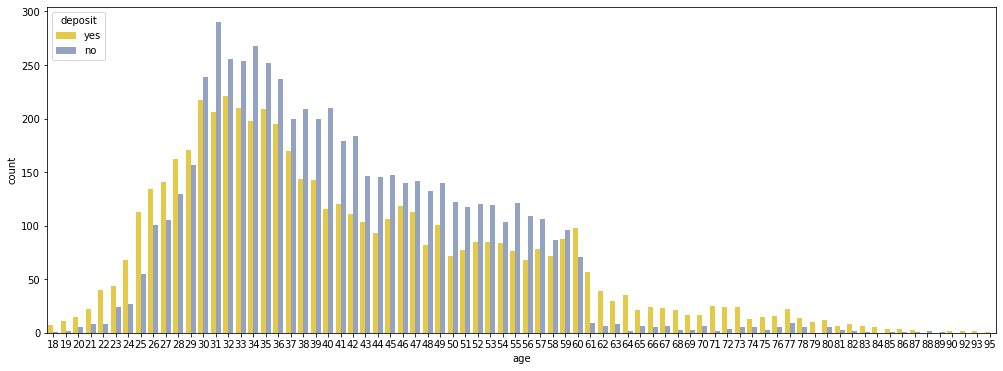

In [24]:
plt.figure(figsize = (17, 6))
sns.countplot('age', hue = 'deposit', data = data , palette= 'Set2_r')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Old
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Old
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Adult
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Old
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Old


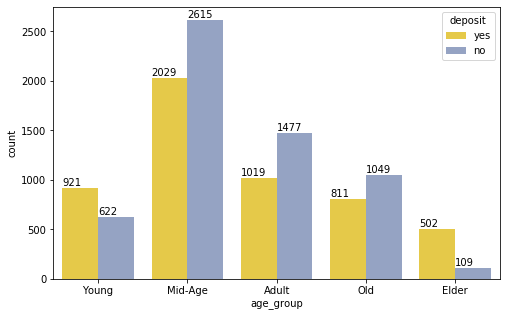

In [25]:
plt.figure(figsize=(8,5))
data["age_group"]=pd.cut(data.age,bins=[18,29,40,50,60,100],labels=['Young','Mid-Age','Adult',"Old",'Elder'])
a= sns.countplot(x="age_group",data=data,hue="deposit",palette="Set2_r")
for i in a.patches:
    a.annotate((i.get_height()),(i.get_x(), i.get_height()+20)) 
data.head()    




#### Analisa
- usia pengaruh dengan penjualan deposito
- should target relatively old age customers who would be looking for safe and profitable investment options. The marketers should ensure to convey the peace of mind and steady source of income these products provide as a value proposition to these customers.

-- source : 
1. Pada penelitian mengenai deposito di Indonesia
2. Journal : Predicting Bank Marketing Campaign Success using Machine Learning

### Membanding korelasi Job-Balance dengan Deposito

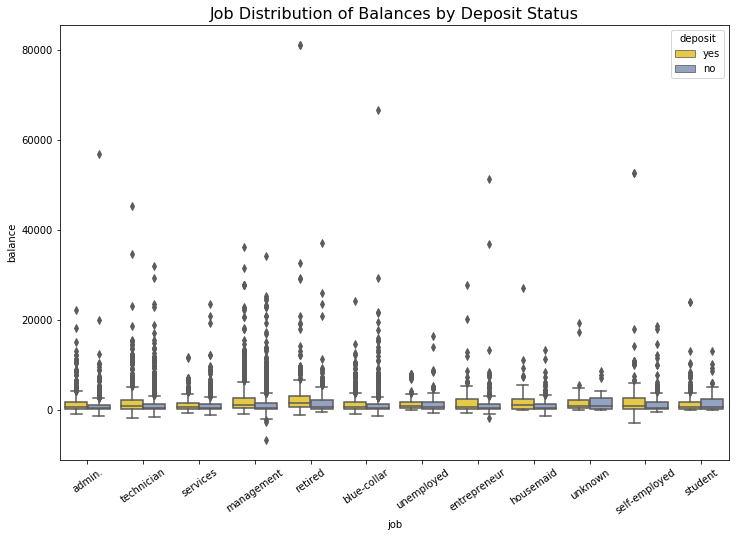

In [26]:
fig = plt.figure(figsize=(12,8))

a= sns.boxplot(y="balance", x="job", hue="deposit", palette="Set2_r",
            data=data);
plt.xticks(rotation=35)

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

#### Analisa:
Management and Retirees are the ones who have the highest balance in their accounts.

### Membandingkan data deposit dan Job nasabah

In [27]:
pd.crosstab(index = data['deposit'], columns = data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36
yes,631,708,123,109,1301,516,187,369,269,840,202,34


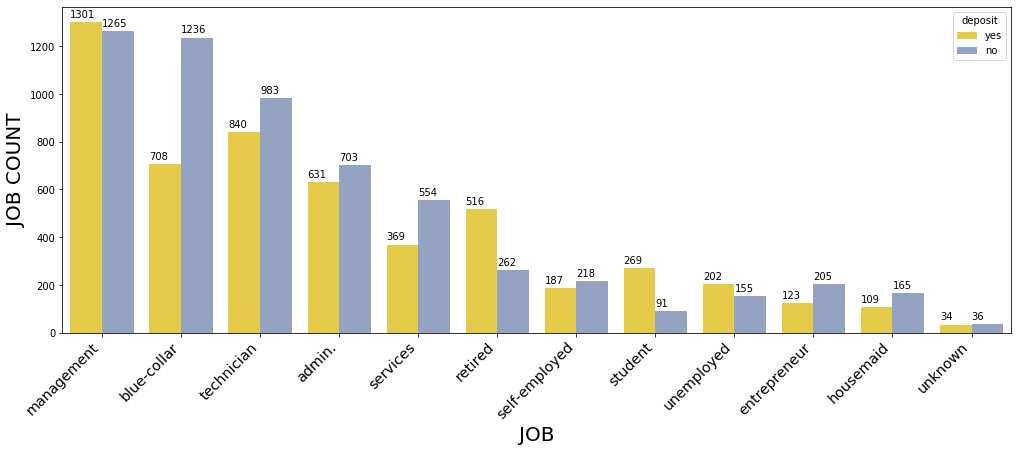

In [28]:
plt.figure(figsize = (17, 6))
a= sns.countplot('job', hue = 'deposit', data = data ,palette= 'Set2_r',order = data['job'].value_counts().index)
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('')
plt.xlabel('JOB',fontsize = 20)
plt.ylabel('JOB COUNT',fontsize = 20)
plt.show()

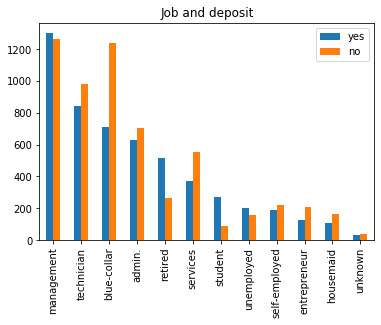

In [29]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

#### Analisa :
-  group of customers who subscribed and therefore are most likely to subscribe to the bank's term deposit. Regarding their characteristics, one
observes that this cluster is made of persons in managerial positions.

--source : Asare-Frempong, J., & Jayabalan, M. (2017, September). Predicting customer response to bank direct telemarketing campaign. In 2017 International Conference on Engineering Technology and Technopreneurship (ICE2T) (pp. 1-4). IEEE.

### Membandingkan data Deposit dan Marital (Status Pernikahan) nasabah

In [30]:
pd.crosstab(index = data['marital'], columns = data['deposit'])

deposit,no,yes
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


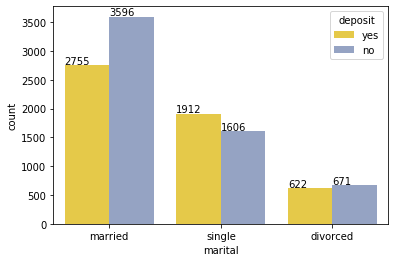

In [31]:
a= sns.countplot('marital',hue='deposit',data=data,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 

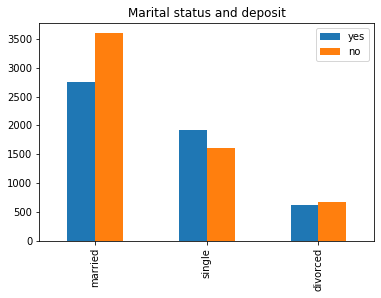

In [32]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

#### Analisa :
Status Lajang memiliki rate deposit lebih tinggi dibandingkan dengan status yang sudah menikah dan status cerai.
status lajang memiliki lebih banyak uang untuk ditabung, sedangkan yang sudah menikah kemungkinan besar sudah memiliki anak
dan lebih membutuhkan dana lebih banyak

### Membandingkan data Deposit dan Education (Tingkat Pendidikan) nasabah/ customer

In [33]:
pd.crosstab(index = data['deposit'], columns = data['education'])

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


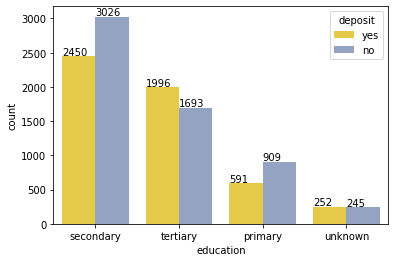

In [34]:
a= sns.countplot('education',hue='deposit',data= data , palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 

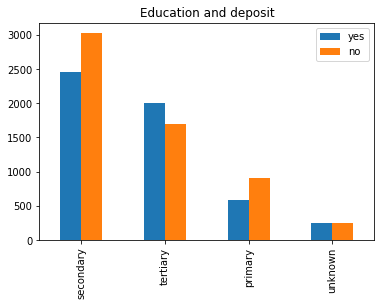

In [35]:
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

#### Analisa :
- the group of customers had a minimum secondary level of education. This indicates that customers with their level of education being secondary and above, make
a good target for direct marketing (sale) of term deposits like treasury bills and bonds

--source : Asare-Frempong, J., & Jayabalan, M. (2017, September). Predicting customer response to bank direct telemarketing campaign. In 2017 International Conference on Engineering Technology and Technopreneurship (ICE2T) (pp. 1-4). IEEE.

### Membandingkan data Deposit dan Default  (has credit in default) nasabah/ customer

In [36]:
pd.crosstab(index = data['deposit'], columns = data['default'])

default,no,yes
deposit,,
no,5757,116
yes,5237,52


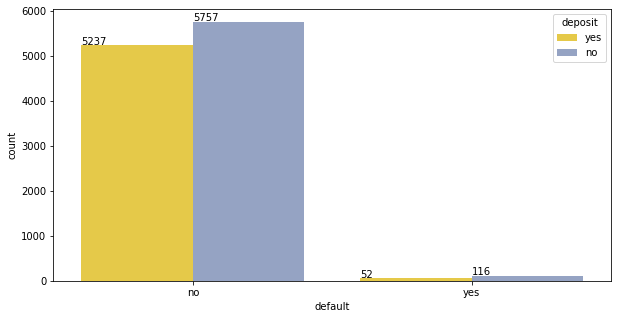

In [37]:
plt.figure(figsize=(10,5))
a= sns.countplot('default',hue='deposit',data=data,palette= 'Set2_r')
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(), p.get_height()+20)) 

#### Analisa:

### Data Deposit =>  Job and Marital nasabah/ customer

In [38]:
pd.crosstab(index = [data['job'], data['marital']], columns = data['deposit'])

deposit                  no  yes
job           marital           
admin.        divorced   92   90
              married   371  306
              single    240  235
blue-collar   divorced   91   58
              married   898  437
              single    247  213
entrepreneur  divorced   27   15
              married   153   81
              single     25   27
housemaid     divorced   28   18
              married   123   67
              single     14   24
management    divorced  146  142
              married   747  681
              single    372  478
retired       divorced   50  121
              married   199  382
              single     13   13
self-employed divorced   17   22
              married   143   79
              single     58   86
services      divorced   71   50
              married   326  178
              single    157  141
student       divorced    1    1
              married     5   10
              single     85  258
technician    divorced  127   77
              married   514  416
              single    342  347
unemployed    divorced   20   27
              married    89   97
              single     46   78
unknown       divorced    1    1
              married    28   21
              single      7   12

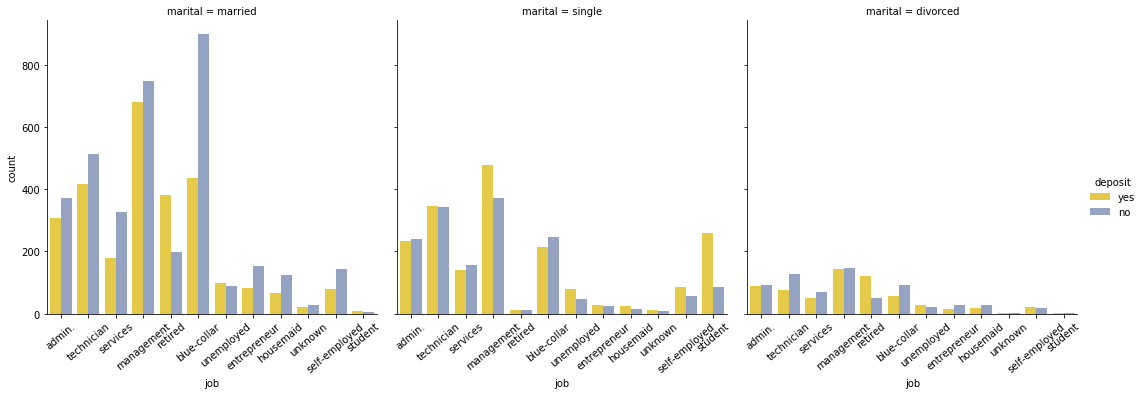

In [39]:
# plt.figure(figsize=(10,3))
g=sns.catplot(x="job", hue="deposit", col="marital", data=data, kind="count",palette="Set2_r")
g.set_xticklabels(rotation=40)
plt.show()



#### Analisa :

- As observed, group of customers who subscribed and therefore are most likely to subscribe to the bank's term deposit. Regarding their characteristics, one
observes that this cluster is made of persons in managerial positions who are married. A logical reason for this might be
for the fact that, as responsible as they are i.e. being managers, they would want to secure the future of their children and themselves when they retire or when the unexpected happens.

--source : Asare-Frempong, J., & Jayabalan, M. (2017, September). Predicting customer response to bank direct telemarketing campaign. In 2017 International Conference on Engineering Technology and Technopreneurship (ICE2T) (pp. 1-4). IEEE.

### Membandingkan data Date/Month dengan Deposit

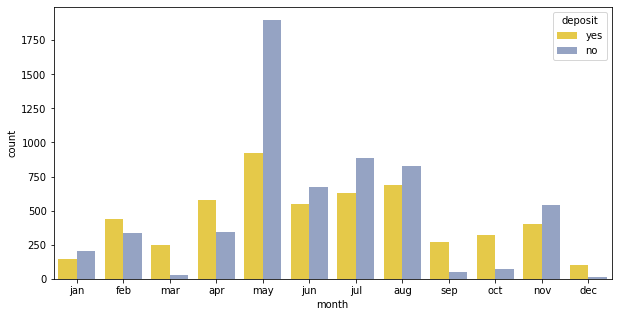

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x="month",hue="deposit",palette="Set2_r",data=data,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

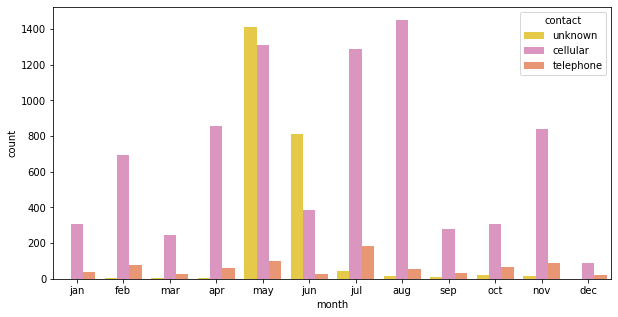

In [41]:
plt.figure(figsize=(10,5))
a= sns.countplot('month',hue='contact',data=data,palette= 'Set2_r',order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

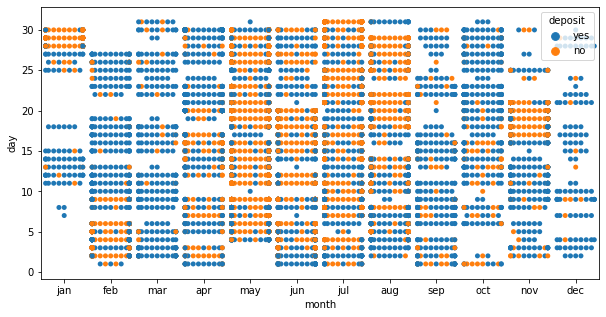

In [42]:
plt.figure(figsize=(10,5))
sns.swarmplot(x="month",y="day",hue="deposit",data=data,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

#### Analisa:
- demand for banking services typically remains relatively flat to slightly down through the summer months. The financial services sector as a whole tends to experience a steady increase in business

--source :
https://www.investopedia.com/ask/answers/052915/banking-sector-subject-any-seasonal-trends.asp

### Membandingkan data Duration(calls) dengan Deposit

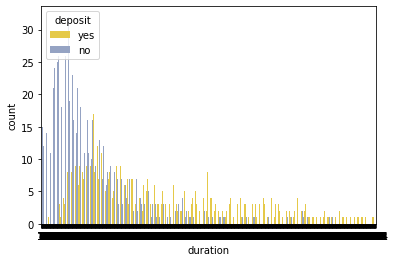

In [43]:
a= sns.countplot('duration',hue='deposit',data=data,palette= 'Set2_r')

In [44]:
avg_duration = data['duration'].mean()

lst = [data]
data["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"

In [45]:
duration_percent = (pd.crosstab(data['duration_status'], data['deposit'],normalize ='index')*100).round(2)
duration_percent

deposit,no,yes
duration_status,,
above_average,22.63,77.37
below_average,68.38,31.62


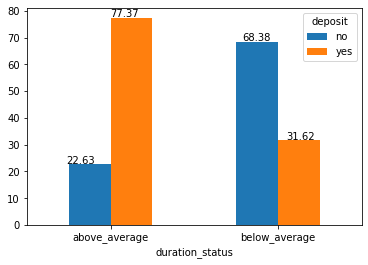

In [46]:
ax=duration_percent.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height()* 1.005))


#### Analisa
- The longer the conversations on the phone, the higher interest the customer will show to the term deposit
- the correlation of the duration variable with the target variable shows that the higher the duration, the more likely it is that the customer will subscribe to the term deposits (correlation = 0.405). This makes intuitive sense because longer duration shows that the customer is interested in the product.



**References**

        Hegde, C., Kaku, A., Pargi,N. (2019). Predicting Bank Marketing Campaign Success using Machine Learning.
        Chen, J., Han, Y., Hu, Z., Lu, Y., & Sun, M. (2014). Who Will Subscribe A Term Deposit?.


### Membandingkan Data Contact dengan Deposit

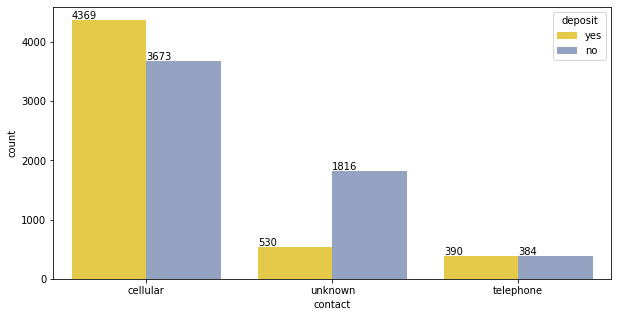

In [47]:
plt.figure(figsize=(10,5))
a= sns.countplot('contact',hue='deposit',data=data,palette= 'Set2_r',order= data['contact'].value_counts().index)
for p in a.patches:
    a.annotate((p.get_height()),(p.get_x(),p.get_height()+20))
            

#### Analisa:
- higher number of calls were taken to mobile and higher number of "yes" response has been taken from mobile.

--source : Wickramanayake, Dimuthu. (2020). Analyzing previous marketing data of a bank to maximize its term deposit subscribers in future marketing campaigns

Text(0.5, 1.0, 'Type of Work by Term Susbriptions')

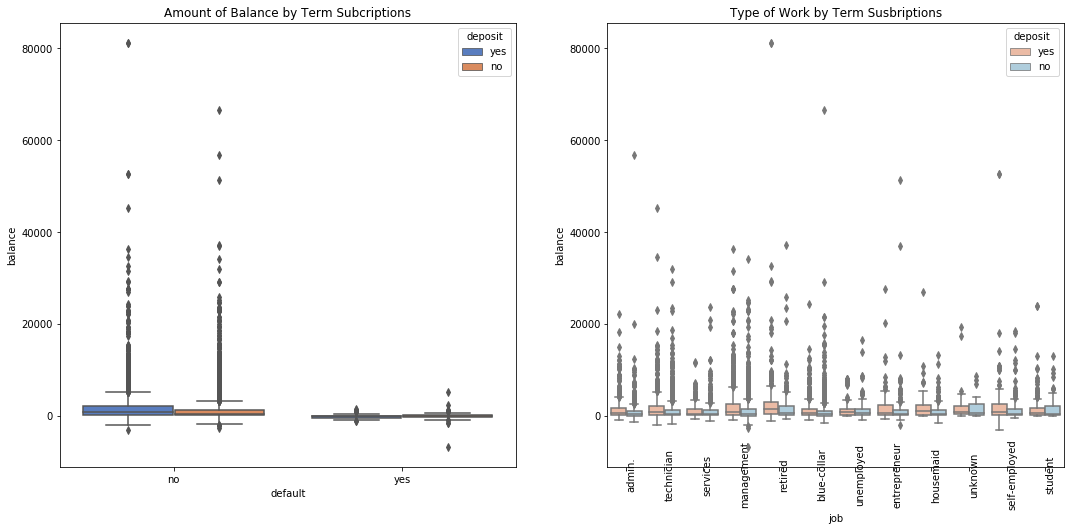

In [48]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

g = sns.boxplot(x="default", y="balance", hue="deposit", data=data, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Subcriptions")

g1 = sns.boxplot(x="job", y="balance", hue="deposit", data= data, palette="RdBu", ax=ax2)

g1.set_xticklabels(data["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Susbriptions")

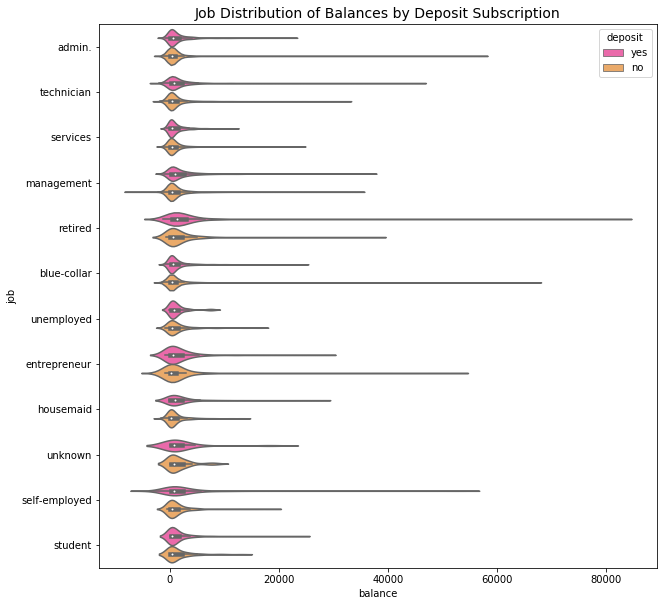

In [49]:
plt.figure(figsize=(10,10))
sns.violinplot(x="balance", y="job", hue="deposit", palette="spring", data=data)

plt.title("Job Distribution of Balances by Deposit Subscription", fontsize=14)

plt.savefig('jobBalanceDeposit.png')
plt.show()

## Analisa :
potential clients that was retired, the most likely to suscribe to a term deposit

# Recommendations

1. Banks can improve their marketing campaigns by focusing their efforts on certain prime-grade clients which are favorable to increase client subscription for the fixed-term products they are offering.
2. Improve the effectiveness of bank direct marketing as well as telemarketing to banks and other financial institutions.
3. The marketers should try to make the call directly to client’s cellular, engaging, and increase the duration of the call.
4. For the next marketing campaign, it will be wise for the bank to focus the marketing during the months of February, March, September, October and December. 
5. Focusing client occupation : Retired, Self-Employed and Management


## <center> THANK YOUU